In [9]:
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('./docs/test.jpg')

In [18]:
class Cifar10:

    def __init__(self):

        self.model = tf.keras.models.load_model('cifar.h5')
        self.classes = np.array([
            'airplane', 'automobile', 'bird', 'cat', 'deer',
            'dog', 'frog', 'horse', 'ship', 'truck'
        ])


    def preprocess_image(self, img:np.ndarray):
        '''
            Args:
                img : np.ndarray shape (Any, Any, 3)
        '''
        img_manipulated = img.copy()
        img_manipulated = cv2.resize(img_manipulated, (32, 32))
        img_manipulated = img_manipulated / 255.0
        return np.expand_dims(img_manipulated, axis=0)
        

    def posprocess_prediction(self, pred:np.ndarray):
        '''
            Args:
                pred : np.ndarray shape (1, 10)
        '''
        pred = pred[0]
        pred = np.argmax(pred)
        return self.classes[pred]

    def predict(self, img:np.ndarray):
        '''
            Args:
                img : np.ndarray shape (Any, Any, 3)
        '''
        img_manipulated = self.preprocess_image(img)
        pred = self.model.predict(img_manipulated)
        pred = self.posprocess_prediction(pred)
        return pred


In [20]:
model = Cifar10()

In [22]:
results = model.predict(img)
print(results)

1/1 [==============================] - 0s 39ms/step
ship


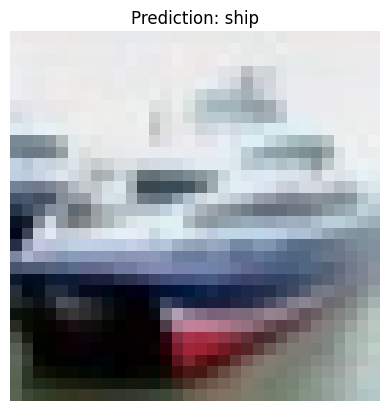

In [25]:
plt.imshow(img)
plt.title(f'Prediction: {results}')
plt.axis(False)
plt.show()